# Example of Timing: Peak Time

In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Noise function

In [2]:
def noise(s):
    rand = random.uniform(0.001,0.999)
    return s * math.log((1 - rand)/rand)

### Time to pulses 

In [3]:
def time_to_pulses(time, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    pulses = 0
    pulse_duration = t_0
    
    while time >= pulse_duration:
        time = time - pulse_duration
        pulses = pulses + 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
        
    return pulses

In [4]:
intervals = [0, 0.011, 0.025, 0.1, 0.5, 1, 10]
print("t (s)", "\t", "pulses")
for t in intervals:
    print(t, "\t", time_to_pulses(t))

t (s) 	 pulses
0 	 0
0.011 	 1
0.025 	 2
0.1 	 6
0.5 	 17
1 	 22
10 	 48


### Pulses to time

In [5]:
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    time = 0
    pulse_duration = t_0
    
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses - 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
    
    return time

In [6]:
pulses_to_time(25)

1.0176213520665298

### Peak time example

In [7]:
def peak(t, reps = 10, n_training = 10, n_trials = 100):
    results = pd.DataFrame(columns = ['rep', 'val'])
    for rep in range(reps):
        goal_pulses = 0
        for i in range(n_training):
            goal_pulses += time_to_pulses(t)
        goal_pulses = goal_pulses / n_training
        for i in range(n_trials):
            val = pulses_to_time(goal_pulses)
            results.loc[len(results)] = [rep, val]
    return results['val']

In [8]:
res18 = peak(18)
res12 = peak(12)
res6 = peak(6)

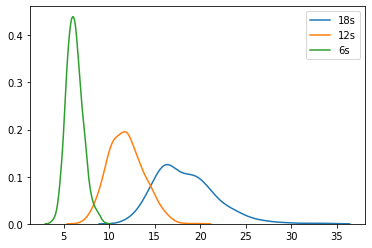

In [9]:
sns.kdeplot(np.array(res18), label="18s")
sns.kdeplot(np.array(res12), label="12s")
sns.kdeplot(np.array(res6), label="6s")

## Assignment: Bisection

Write a function that generates a bisection plot given a range of values to be tested, number of simulated subjects, number of training trials for long and short, and number of test trial per subject.

`def bisection(values, reps = 100, n_training = 10, n_trials = 10):`

You should be able to call the function with:

`values_3to6 = [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]`

`bisection(values_3to6)`

which should then produce something like:



Other value ranges you can try are:

`values_4to12 = [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]`

`values_2to8 = [2, 2.52, 3.18, 4, 5.04, 6.35, 8]`

In [10]:
def bisection(values, subjects = 100, n_training = 10, n_test = 10):
    
    prop = np.zeros((len(values), subjects))
    plot_prop = []
    
    for sub_idx in range(subjects):
        # Training participants
        short_pulse = []
        long_pulse = []
    
        for train_iter in range(n_training):
            short_pulse.append(time_to_pulses(values[0]))
            long_pulse.append(time_to_pulses(values[-1]))
            mean_short_pulse = np.mean(short_pulse)
            mean_long_pulse = np.mean(long_pulse)
            
        #Testing participants and classifying outputs as long or short
        long_count = np.zeros((len(values), n_test))

        for test_iter in range(n_test):
            for val_idx in range(len(values)):
                if abs(time_to_pulses(values[val_idx]) - mean_short_pulse) > abs(time_to_pulses(values[val_idx]) - mean_long_pulse):
                    long_count[val_idx,test_iter] = 1
                else:
                    long_count[val_idx,test_iter] = 0
                
        for val_idx in range(len(values)):
            prop[val_idx,sub_idx] = np.sum(long_count[val_idx])/(n_test)
                    
    for val_idx in range(len(values)):
        plot_prop.append(np.mean(prop[val_idx]))
            
    
    plt.plot(values, plot_prop, marker = "o")
    plt.grid(True)
    plt.xlabel('Time interval (s)')
    plt.ylabel('Proportion long')
    plt.show()
    return

### Bisection: 2-8 second simulation

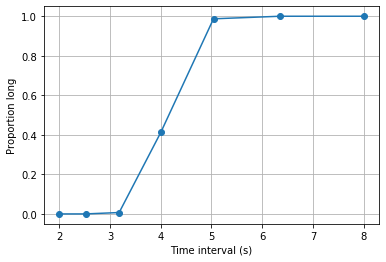

In [11]:
values_2to8 = [2, 2.52, 3.18, 4, 5.04, 6.35, 8]
bisection(values_2to8)

### Bisection: 3-6 second simulation

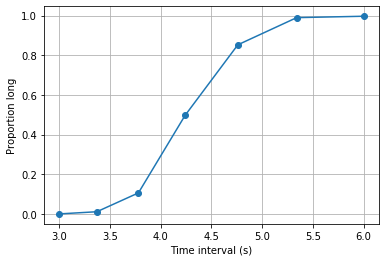

In [12]:
values_3to6 = [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]

bisection(values_3to6)

### Bisection: 4-12 second simulation

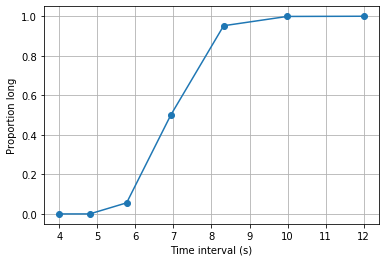

In [13]:
values_4to12 = [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]
bisection(values_4to12)